
# Lecture 22: Big Oh and Theta (Complexity Analysis)

Welcome to **Lecture 22** of our MIT-inspired course *Introduction to Computer Science and Programming using Python*! 🎉  

Today, we’ll explore **algorithm complexity**: how to measure and compare how fast or efficient programs are.  
This is a crucial step before diving deep into **data science**.

---

## Learning Objectives
By the end of this lab, you will:
- Understand **Big-O** and **Big-Theta** notation
- Compare algorithms using **timing experiments**
- Learn to **count operations**
- Simplify expressions to determine their complexity
- Analyze code examples to calculate their asymptotic complexity

We’ll combine **theory + hands-on coding exercises** so it’s fun and engaging 🚀.


In [ ]:

import time

# Example 1: Constant time function
def convert_to_km(m):
    return m * 1.609

# Example 2: Linear time function
def compound(invest, interest, n_months):
    total = 0
    for i in range(n_months):
        total = total * interest + invest
    return total

# Test inputs
L_N = [1, 10, 100, 1000, 10000]

print("Timing convert_to_km (constant time):")
for N in L_N:
    t0 = time.perf_counter()
    convert_to_km(N)
    dt = time.perf_counter() - t0
    print(f"N={N:<6} -> {dt:.2e} seconds")

print("\nTiming compound (linear time):")
for N in L_N:
    t0 = time.perf_counter()
    compound(10, 1.05, N)
    dt = time.perf_counter() - t0
    print(f"N={N:<6} -> {dt:.2e} seconds")


Timing convert_to_km (constant time):
N=1      -> 1.48e-06 seconds
N=10     -> 9.25e-07 seconds
N=100    -> 4.30e-07 seconds
N=1000   -> 3.84e-07 seconds
N=10000  -> 4.00e-07 seconds

Timing compound (linear time):
N=1      -> 2.90e-06 seconds
N=10     -> 2.66e-06 seconds
N=100    -> 6.54e-06 seconds
N=1000   -> 6.30e-05 seconds
N=10000  -> 6.93e-04 seconds


# Lecture 22: Big Oh and Theta – Working with Lists 📝

Welcome to our **hands-on lab** for Lecture 22!  
Today we’ll focus only on **list operations** and their complexity.  

We’ll explore:
- Measuring time for **summing elements in a list**
- Measuring time for **finding an element in a list**
- Comparing different **search strategies**: linear search, binary search, and Python’s built-in `in`.

This will help you **see how complexity grows** with input size 📈.


In [ ]:
import time

def sum_of(L):
    total = 0.0
    for elt in L:
        total = total + elt
    return total

# List sizes (1, 10, 100, 1000, ...)
L_N = [1]
for i in range(7):
    L_N.append(L_N[-1]*10)

# Measure time
for N in L_N:
    L = list(range(N))
    t = time.perf_counter()
    s = sum_of(L)
    dt = time.perf_counter()-t
    print(f"sum_of({N}) took {dt:.2e} seconds ({1/dt:,.2f}/sec)")

sum_of(1) took 2.12e-06 seconds (472,143.53/sec)
sum_of(10) took 2.69e-06 seconds (371,885.46/sec)
sum_of(100) took 7.57e-06 seconds (132,135.31/sec)
sum_of(1000) took 3.75e-05 seconds (26,661.69/sec)
sum_of(10000) took 3.73e-04 seconds (2,684.34/sec)
sum_of(100000) took 5.64e-03 seconds (177.35/sec)
sum_of(1000000) took 4.13e-02 seconds (24.22/sec)
sum_of(10000000) took 3.93e-01 seconds (2.54/sec)


### 🔎 Observations (Sum of List)
1. The **size of the input** is the **length of the list**, not how big the numbers are.  
2. Average time increases roughly ×10 when list length increases ×10.  
3. Relationship becomes clearer for **larger inputs**.  
4. The growth looks **linear (Θ(n))**, comparable to other linear algorithms like compound interest calculation.  

We’ll explore:
- Measuring time for **summing elements in a list**
- Measuring time for **finding an element in a list**
- Comparing different **search strategies**: linear search, binary search, and Python’s built-in `in`.

This will help you **see how complexity grows** with input size 📈.

In [ ]:
# Linear search
def is_in(L, x):
    for elt in L:
        if elt == x:
            return True
    return False

# Binary search (requires sorted list)
def binary_search(L, x):
    lo = 0
    hi = len(L)
    while hi-lo > 1:
        mid = (hi+lo) // 2
        if L[mid] <= x:
            lo = mid
        else:
            hi = mid
    return L[lo] == x

# Compare timing of is_in, binary_search, and Python's built-in "in"
L_N = [10**i for i in range(3, 7)]  # 1,000 -> 1,000,000

for N in L_N:
    L = list(range(N))

    # Linear search timing
    t = time.perf_counter()
    is_in(L, N-1)
    dt = time.perf_counter() - t
    print(f"is_in({N}) -> {dt:.2e} seconds")

    # Binary search timing
    t = time.perf_counter()
    binary_search(L, N-1)
    dt = time.perf_counter() - t
    print(f"binary_search({N}) -> {dt:.2e} seconds")

    # Built-in search timing
    t = time.perf_counter()
    (N-1) in L
    dt = time.perf_counter() - t
    print(f"in operator ({N}) -> {dt:.2e} seconds\n")


is_in(1000) -> 4.97e-05 seconds
binary_search(1000) -> 8.98e-06 seconds
in operator (1000) -> 2.24e-05 seconds

is_in(10000) -> 3.36e-04 seconds
binary_search(10000) -> 5.86e-06 seconds
in operator (10000) -> 2.03e-04 seconds

is_in(100000) -> 3.23e-03 seconds
binary_search(100000) -> 9.43e-06 seconds
in operator (100000) -> 1.84e-03 seconds

is_in(1000000) -> 3.23e-02 seconds
binary_search(1000000) -> 1.30e-05 seconds
in operator (1000000) -> 2.03e-02 seconds



### 🔎 Observations (Searching in a List)
1. **Linear search** (`is_in`) grows ×10 in time when list size grows ×10 → Θ(n).  
2. **Binary search** grows very slowly, almost independent of list size → Θ(log n).  
3. **Built-in `in` operator** is optimized but behaves like linear search for lists.  
4. For very large lists, **binary search is dramatically faster** than linear search. 🚀  


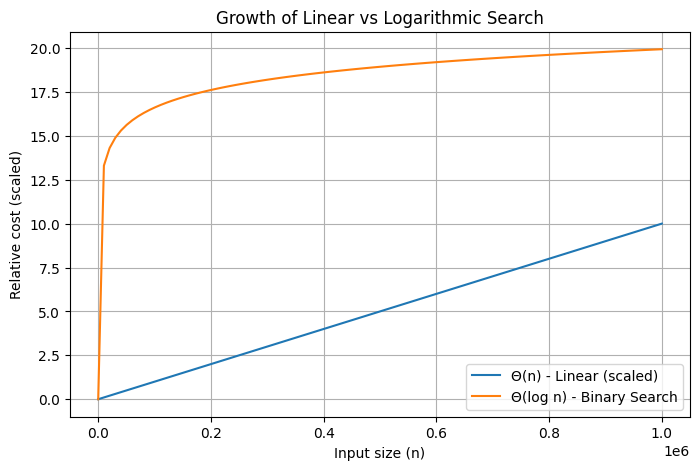

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = np.linspace(1, 1000000, 100)
linear = n
logarithmic = np.log2(n)

plt.figure(figsize=(8,5))
plt.plot(n, linear/100000, label="Θ(n) - Linear (scaled)")
plt.plot(n, logarithmic, label="Θ(log n) - Binary Search")
plt.title("Growth of Linear vs Logarithmic Search")
plt.xlabel("Input size (n)")
plt.ylabel("Relative cost (scaled)")
plt.legend()
plt.grid(True)
plt.show()

### 📈 Visualizing Search Growth
- Linear search grows proportionally with list size.  
- Binary search grows much more slowly (logarithmic).  
- This shows **why choosing the right algorithm matters** for performance.  



# 🎯 Wrap-Up

In this lab we focused on **list operations** and complexity:
- Summing a list → **Θ(n)**
- Linear search → **Θ(n)**
- Binary search → **Θ(log n)**
- Python's `in` operator → behaves like **Θ(n)** for lists

✅ Key idea: As input size grows, the **differences between algorithms become dramatic**.  

---
Next time, we’ll extend this to **other data structures** and see how complexity changes.

Great work today, team! 🚀


## Subtopics: Counting, Order of Growth, Big Idea (Theta in terms of input)


In this notebook, we'll explore three key concepts from algorithm analysis:

- Counting Operations
- Order of Growth
- The Big Idea: Expressing Θ in terms of input

This lab is designed to be interactive, fun, and practical so you can follow along in Google Colab 🚀

## Part 1: Counting Operations
We assume each of the following takes constant time:

- Mathematical operations
- Comparisons
- Assignments
- Accessing objects in memory
- Let's practice by counting the number of operations in some Python functions.

In [ ]:

# Counting operations manually
count = 0

def is_in_counter(L, x):
    global count
    for elt in L:
        count += 2  # one for assigning elt, one for comparison
        if elt == x:
            return True
    return False

N = 100
L = list(range(N))
count = 0
is_in_counter(L, N-1)
print(f"is_in on list of size {N} performed {count} operations")


is_in on list of size 100 performed 200 operations


In [ ]:
def binary_search_counter(L, x):
    global count
    lo = 0
    hi = len(L)
    count += 3
    while hi-lo > 1:
        count += 2
        mid = (hi+lo)//2
        count += 3
        if L[mid] <= x:
            lo = mid
        else:
            hi = mid
        count += 3
    count += 3
    return L[lo] == x

# Test binary search counting
L = list(range(100))
count = 0
binary_search_counter(L, 42)
print("Operations used:", count)

### Observation:

is_in_counter grows linearly with the size of L.
binary_search_counter grows much more slowly (logarithmically).  

## 📊 Big-O and Big-Theta Notation

- **Big-O (O)**: Upper bound — worst-case growth rate.
- **Big-Theta (Θ)**: Tight bound — both lower and upper.

### Example:
If an algorithm runs in:  
\( f(n) = 3n^2 + 20n + 1 \)  

- Big-O: \( O(n^2) \)  
- Big-Theta: \( Θ(n^2) \)  

👉 Why? Because the \( n^2 \) term dominates as input size grows.



## ✍️ Exercises (Finger Practice)

Simplify the following and determine Θ in terms of *n*:

1. \( n^2 + \log(n) + 2^a \)  
2. \( 2^n + n \log(n) + n^2 \)  
3. \( f \log(f) + 100000 + 300a + xyz \)  

Write your answers in a markdown cell below and then discuss as a group 🤓.


In [ ]:

# Practice analyzing algorithm complexity

def diameter(L):
    farthest_dist = 0
    for i in range(len(L)):
        for j in range(i+1, len(L)):
            p1, p2 = L[i], L[j]
            dist = ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2) ** 0.5
            if dist > farthest_dist:
                farthest_dist = dist
    return farthest_dist

# Let's test with different sizes
import math

def create_points(N):
    return [(math.cos(i)*i, math.sin(i)*i) for i in range(N)]

for N in [100, 200, 400, 800]:
    L = create_points(N)
    t0 = time.perf_counter()
    diameter(L)
    dt = time.perf_counter()-t0
    print(f"N={N:<5} -> {dt:.4f} seconds")


N=100   -> 0.0032 seconds
N=200   -> 0.0123 seconds
N=400   -> 0.0428 seconds
N=800   -> 0.1890 seconds



## 📈 Visualizing Growth Rates

This plot compares common complexity classes:

- **Logarithmic (Θ(log n))** – grows very slowly  
- **Linear (Θ(n))** – scales directly with input  
- **Quadratic (Θ(n²))** – grows much faster  
- **Exponential (Θ(2ⁿ))** – explodes rapidly 🚨  

👉 Notice how for small inputs they may look similar, but as `n` grows, the difference becomes dramatic.


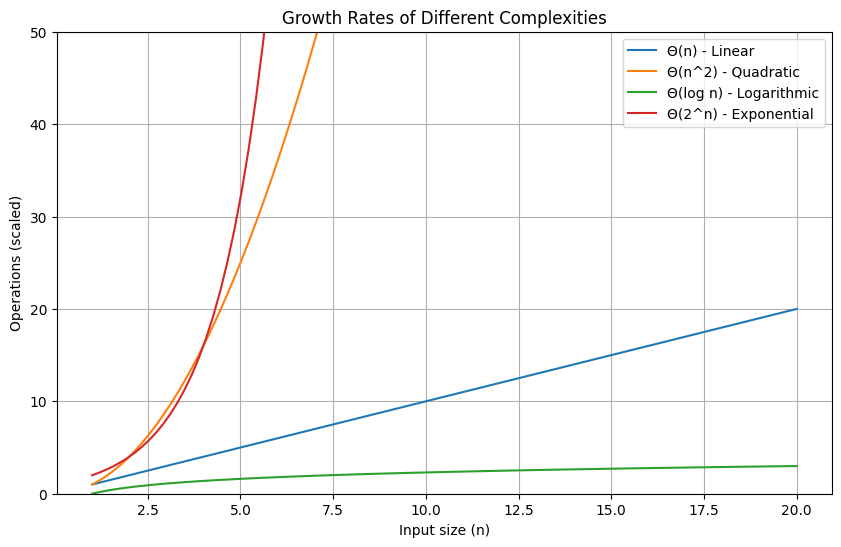

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Define input sizes
n = np.linspace(1, 20, 100)

# Define growth functions
linear = n
quadratic = n**2
logarithmic = np.log(n)
exponential = 2**n

# Plot
plt.figure(figsize=(10,6))
plt.plot(n, linear, label="Θ(n) - Linear")
plt.plot(n, quadratic, label="Θ(n^2) - Quadratic")
plt.plot(n, logarithmic, label="Θ(log n) - Logarithmic")
plt.plot(n, exponential, label="Θ(2^n) - Exponential")

plt.ylim(0, 50)  # Limit y-axis for clarity
plt.title("Growth Rates of Different Complexities")
plt.xlabel("Input size (n)")
plt.ylabel("Operations (scaled)")
plt.legend()
plt.grid(True)
plt.show()


## Part 2: Order of Growth
Order of Growth describes how the number of operations grows as the size of input increases.

- mysum(x) → grows linearly → Θ(x)
- square(x) (nested loops) → grows quadratically → Θ(x²)

We only care about the dominant term for large inputs.

In [ ]:
def mysum(x):
    total = 0
    for i in range(x):
        total += i
    return total

def square(x):
    total = 0
    for i in range(x):
        for j in range(x):
            total += i*j
    return total

print("mysum(10):", mysum(10))
print("square(10):", square(10))


- mysum(x) → about 3x+2 ops → Θ(x)
- square(x) → about x² ops → Θ(x²)

👉 Order of Growth helps us predict performance for very large inputs.



## 💡 Part 3: The Big Idea – Express Θ in terms of input

Don't just use `n` all the time!  
Always express Θ **in terms of the actual input** to the problem.  

Examples:  
- `convert_to_km(x)` → Θ(1), input is an integer  
- `sum_of(L)` → Θ(len(L)), input is a list  
- `is_in(L, e)` → Θ(len(L)), input depends on **list length** not the values inside  



Let's practice!


In [ ]:
def f(L):
    Lnew = []
    for i in L:
        Lnew.append(i**2)
    return Lnew

print(f([1,2,3,4,5]))

## 📝 Student Exercises

1. Write a function that multiplies two matrices. Count the number of operations. What is the order of growth?  
2. Modify `is_in_counter` to also count the **worst case**, **best case**, and **average case** separately.  
3. Analyze the following function. Express its Θ in terms of input size:

```python
def f(L, L1, L2):
    inL1 = False
    for i in range(len(L)):
        if L[i] == L1[i]:
            inL1 = True
    inL2 = False
    for i in range(len(L)):
        if L[i] == L2[i]:
            inL2 = True
    return inL1 and inL2
```
(Hint: Focus on **list length** as the input size.)

---


## ✅ Wrap-up

- **Counting operations**: machine-independent way to evaluate algorithms.  
- **Order of Growth**: focus on how runtime scales with input size.  
- **Big Idea**: Always express Θ in terms of the input (list length, integer value, etc.).  

This helps us reason about **efficiency and scalability** of algorithms.  

🎉 Great work! You just mastered key parts of **Big Oh and Theta**!



## Visualizing Growth Rates

Now let’s **see** how different growth rates compare:  

- **Logarithmic Θ(log n)** grows very slowly  
- **Linear Θ(n)** grows steadily  
- **Quadratic Θ(n²)** grows much faster  
- **Exponential Θ(2^n)** explodes even for small `n`  

This plot makes it clear why algorithm efficiency matters so much as input size increases.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define input sizes
n = np.linspace(1, 100, 100)

# Define growth functions
linear = n
quadratic = n**2
logarithmic = np.log2(n)
exponential = 2**(n/10)  # scaled for visualization

# Plot the functions
plt.figure(figsize=(10,6))
plt.plot(n, linear, label="Linear Θ(n)")
plt.plot(n, quadratic, label="Quadratic Θ(n²)")
plt.plot(n, logarithmic, label="Logarithmic Θ(log n)")
plt.plot(n, exponential, label="Exponential Θ(2^n)")

plt.ylim(0, 200)  # limit y-axis for better visualization
plt.title("Growth Rate Comparison")
plt.xlabel("Input size (n)")
plt.ylabel("Operations (arbitrary units)")
plt.legend()
plt.grid(True)
plt.show()



# 🎯 Summary

- We learned how to **time programs** and **count operations**
- Introduced **Big-O** (upper bound) and **Big-Theta** (tight bound)
- Practiced simplifying expressions to determine complexity
- Analyzed real Python functions and classified their complexity
- Visualized how different growth rates compare as input grows

✅ Complexity analysis is **independent of hardware** — it’s about the **algorithm itself**.  
This helps us choose the **best algorithm** for big problems.

---

### 🔮 Next Lecture
We’ll dive deeper into **Complexity Classes** and how they shape algorithm design (Lecture 23).

Great work today, team! 🚀
